From Chris Nho comes a question of rolling (and re-rolling) a die:

You start with a fair 6-sided die and roll it six times, recording the results of each roll. You then write these numbers on the six faces of another, unlabeled fair die. For example, if your six rolls were 3, 5, 3, 6, 1 and 2, then your second die wouldn’t have a 4 on it; instead, it would have two 3s.

Next, you roll this second die six times. You take those six numbers and write them on the faces of yet another fair die, and you continue this process of generating a new die from the previous one.

Eventually, you’ll have a die with the same number on all six faces. What is the average number of rolls it will take to reach this state?

Extra credit: Instead of a standard 6-sided die, suppose you have an N-sided die, whose sides are numbered from 1 to N. What is the average number of rolls it would take until all N sides show the same number?

In [29]:
import numpy as np
import pandas as pd
import seaborn as sns

from tqdm import tqdm

from matplotlib import pyplot as plt
%matplotlib inline

from joblib import Parallel, delayed

sns.set_style('whitegrid')
sns.set_context('poster')

# Define a changable die

In [2]:
def dice(faces = [1,2,3,4,5,6],
         ):
    n = len(faces)
    p = np.array([1] * n) / n
    return np.random.choice(faces,size = 1,p = p)[0]

# test a fair die

In [3]:
results = np.array([dice() for _ in tqdm(range(int(1e5)))])

100%|███████████████████████████████| 100000/100000 [00:04<00:00, 20466.07it/s]


[(0, 7)]

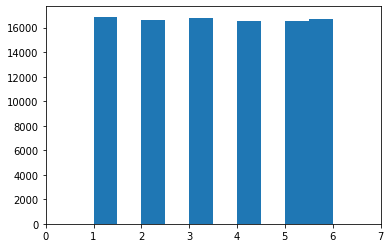

In [4]:
fig,ax = plt.subplots()
ax.hist(results.flatten())
ax.set(xlim = (0,7))

# let's do this experiment once to get an idea of how to functionalize it

In [5]:
np.random.seed(12345)
initial = np.array([dice() for _ in range(6)])
print(initial)

[6 2 2 2 4 4]


In [6]:
second = np.array([dice(faces = initial) for _ in range(6)])
print(second)

[4 2 4 2 4 4]


In [7]:
third = np.array([dice(faces = second) for _ in range(6)])
print(third)

[4 4 2 2 4 4]


# Ok, I have some ideas about how to functionalize this. 

In [8]:
initial = np.array([dice() for _ in range(6)])
unique_faces = np.unique(initial)
this_roll = initial.copy()
counts = 0
for _ in range(int(1e7)):
    next_roll = np.array([dice(faces = this_roll) for _ in range(6)])
    counts += 1
    unique_faces = np.unique(next_roll)
    if len(unique_faces) < 2:
        break
    else:
        this_roll = next_roll.copy()
        
final_roll = next_roll.copy()
print(final_roll)

[3 3 3 3 3 3]


In [19]:
def experiment(faces = [1,2,3,4,5,6]):
    initial = np.array([dice(faces = faces) for _ in range(len(faces))])
    unique_faces = np.unique(initial)
    this_roll = initial.copy()
    counts = 0
    for _ in range(int(1e7)):
        next_roll = np.array([dice(faces = this_roll) for _ in range(6)])
        counts += 1
        unique_faces = np.unique(next_roll)
        if len(unique_faces) < 2:
            break
        else:
            this_roll = next_roll.copy()
    final_roll = next_roll.copy()
    return counts

In [10]:
n_sims = int(2e5)
results = Parallel(n_jobs = -1,verbose =1)(delayed(experiment)(**{'faces':[1,2,3,4,5,6]}) for _ in range(n_sims))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 486 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 10086 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done 26086 tasks      | elapsed:   36.9s
[Parallel(n_jobs=-1)]: Done 48486 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 77286 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 112486 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 154086 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 200000 out of 200000 | elapsed:  5.1min finished


In [13]:
results = np.array(results)

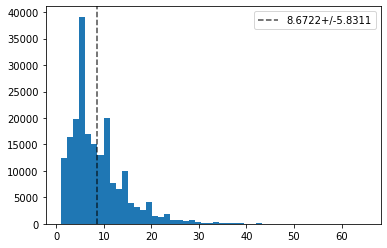

In [16]:
fig,ax = plt.subplots()
_=ax.hist(results,bins = 50)
_=ax.axvline(results.mean(),
             linestyle = '--',
             color = 'black',
             alpha = 0.7,
             label = f'{results.mean():.4f}+/-{results.std():.4f}')
ax.legend()

# generalize to arbitrary faces

In [20]:
n_sims = int(1e5)
faces = [1,2]
results = Parallel(n_jobs = -1,
                   verbose =1,
    )(delayed(experiment)(**{'faces':faces}) for _ in range(n_sims))
results = np.array(results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 3528 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 22728 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 54728 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.1min finished


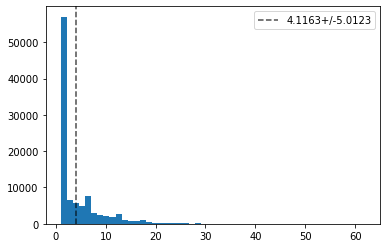

In [21]:
fig,ax = plt.subplots()
_=ax.hist(results,bins = 50)
_=ax.axvline(results.mean(),
             linestyle = '--',
             color = 'black',
             alpha = 0.7,
             label = f'{results.mean():.4f}+/-{results.std():.4f}')
ax.legend()

In [22]:
results = {}
for n_faces in np.arange(2,31):
    faces = np.arange(n_faces) + 1
    temp = Parallel(n_jobs = -1,
                   verbose =1,
    )(delayed(experiment)(**{'faces':faces}) for _ in range(n_sims))
    temp = np.array(temp)
    results[n_faces] = temp
results = pd.DataFrame(results)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 3040 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 19240 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 46240 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done 84040 tasks      | elapsed:   52.0s
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1836 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 11736 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 28236 tasks      | elapsed:   29.2s
[Parallel(n_jobs=-1)]: Done 51336 tasks      | elapsed:   52.4s
[Parallel(n_jobs=-1)]: Done 81036 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1676 tasks      

[Parallel(n_jobs=-1)]: Done 1160 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 7160 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 17160 tasks      | elapsed:   40.0s
[Parallel(n_jobs=-1)]: Done 31160 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 49160 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 71160 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 97160 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  3.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 3944 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done 9444 tasks      | elapsed:   24.0s
[Parallel(n_jobs=-1)]: Done 17144 tasks      | elapsed:   43.0s
[Parallel(n_jobs=-1)]: Done 27044 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 39144 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]

[Parallel(n_jobs=-1)]: Done 70056 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 88756 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  4.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 5736 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 13736 tasks      | elapsed:   39.2s
[Parallel(n_jobs=-1)]: Done 24936 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 39336 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 56936 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 77736 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 100000 out of 100000 | elapsed:  4.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 552 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 2952 tasks      | elapsed:    8

In [27]:
results_to_plot = pd.melt(results,
                          id_vars = None,
                          value_vars = results.columns,
                          var_name = '# faces',
                          value_name = 'Times',
                          )

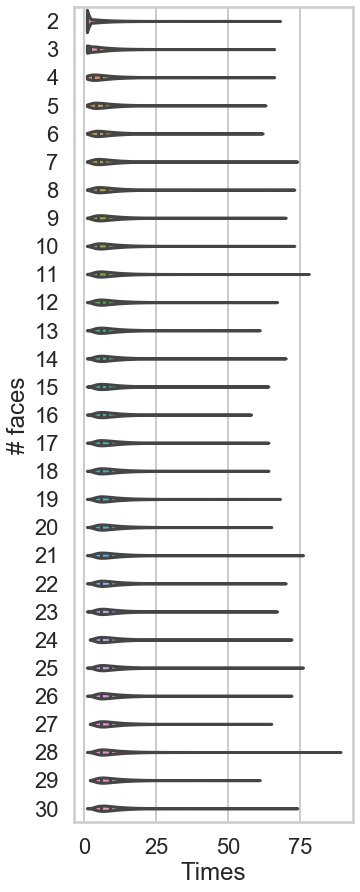

In [35]:
fig,ax = plt.subplots(figsize = (5,15))
ax = sns.violinplot(x = 'Times',
                    y = '# faces',
                    data = results_to_plot,
                    orient = 'h',
                    ax = ax,
                    cut = 0,
                    inner = 'quartile',
                    )

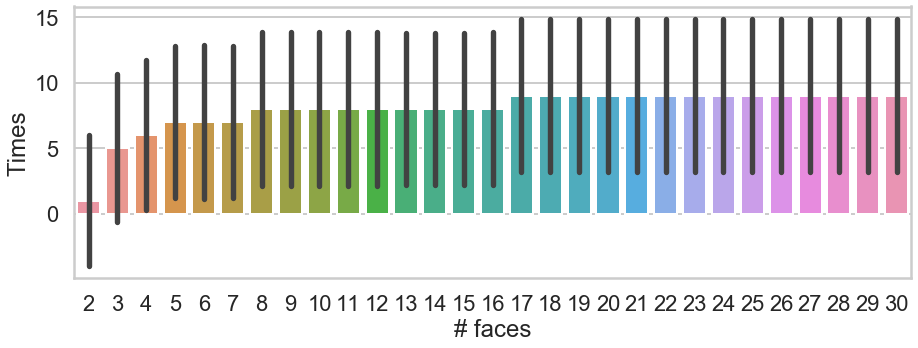

In [39]:
fig,ax = plt.subplots(figsize = (15,5))
ax = sns.barplot(x = '# faces',
                 y = 'Times',
                 data = results_to_plot,
                 estimator = np.median,
                 ci = 'sd',
                 ax = ax,
                )